In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

In [2]:
env = Maze()

D:\A\envs\tensorflow\lib\site-packages\pyglet\image\codecs\wic.py:406: UserWarning: [WinError -2147417850] Cannot change thread mode after it is set
  warnings.warn(str(err))


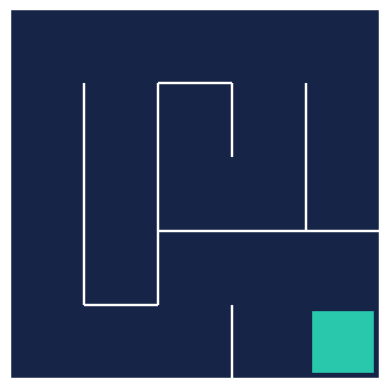

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
env.close()

In [5]:
print(f"Observation space shape: {env.observation_space.nvec}")
print(f"Number of actions: {env.action_space.n}")

Observation space shape: [5 5]
Number of actions: 4


In [6]:
policy_probs = np.full((5,5,4),0.25)

In [7]:
def policy(state):
    return policy_probs[state]

In [8]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


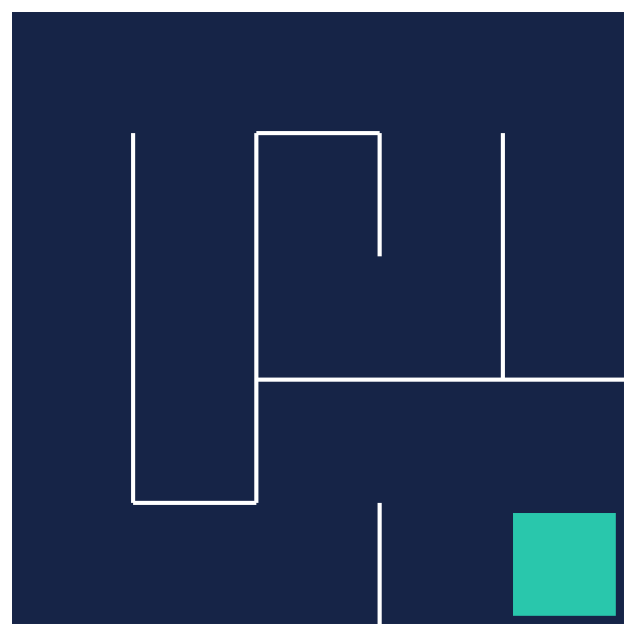

In [9]:
test_agent(env,policy, episodes=1)

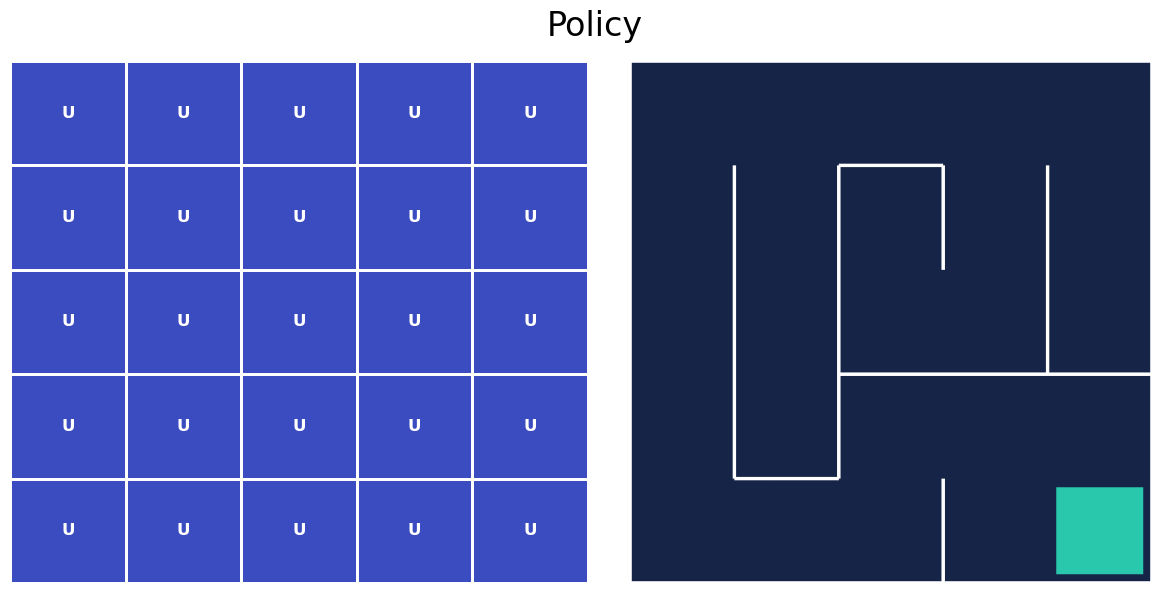

In [10]:
plot_policy(policy_probs, frame)

In [11]:
state_values = np.zeros(shape=(5,5))

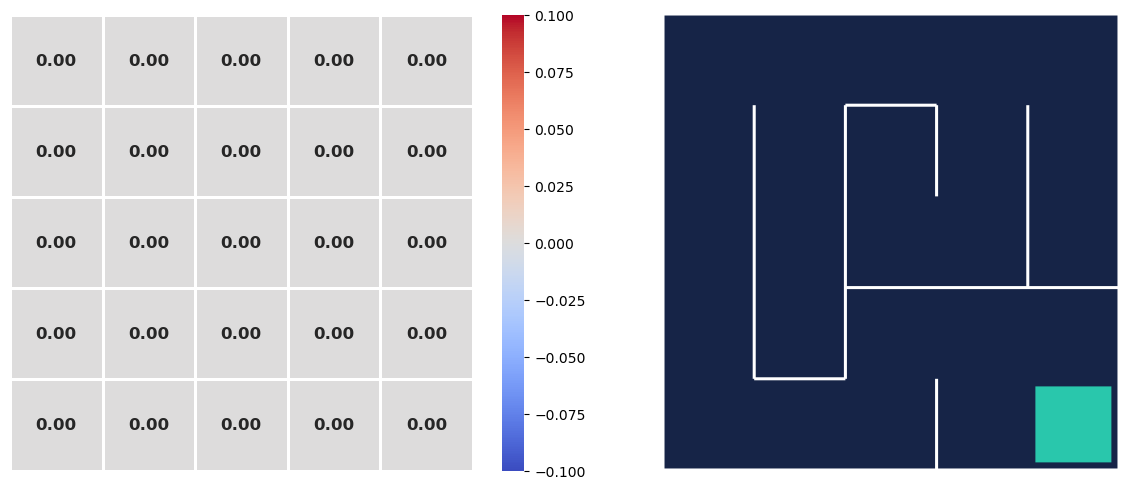

In [12]:
plot_values(state_values,frame)

In [13]:
def policy_evaluation(policy_probs,state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    
    while delta > theta:
        delta = 0
        
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row,col)]
                new_value = 0
                action_probabilities = policy_probs[(row,col)]
                
                for action, prob in enumerate(action_probabilities):
                    next_state, reward, _, _ = env.simulate_step((row,col),action)
                    new_value += prob * (reward + gamma * state_values[next_state])
                
                state_values[(row, col)] = new_value
                
                delta = max(delta, abs(old_value - new_value))

In [14]:
def policy_improvement(policy_probs, state_values, gamma=0.99):
    policy_stable = True
    
    for row in range(5):
        for col in range(5):
            old_action = policy_probs[(row, col)].argmax()
            
            new_value = None
            max_qsa = float("-inf")
            
            for action in range(4):
                next_state, reward, _, _ = env.simulate_step((row,col),action)
                qsa = reward + gamma * state_values[next_state]
                if qsa > max_qsa:
                    max_qsa = qsa
                    new_action = action
                
            action_probs = np.zeros(4)
            action_probs[new_action] = 1.
            policy_probs[(row, col)] = action_probs
            
            if new_action != old_action:
                policy_stable = False
    return policy_stable

In [15]:
def policy_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    policy_stable = False
    
    while not policy_stable:
        policy_evaluation(policy_probs, state_values, theta, gamma)
        
        policy_stable = policy_improvement(policy_probs, state_values, gamma)


In [16]:
policy_iteration(policy_probs, state_values)

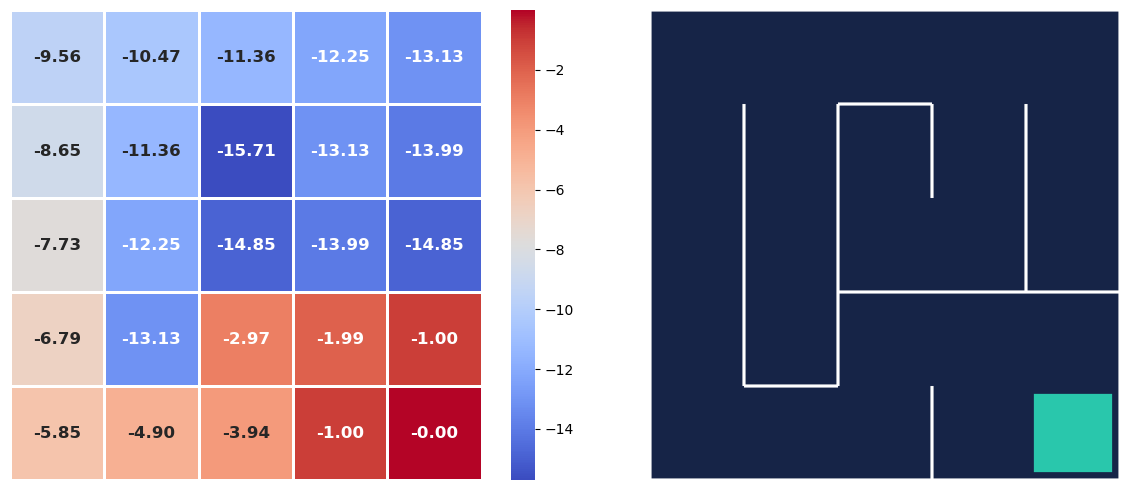

In [17]:
plot_values(state_values, frame)

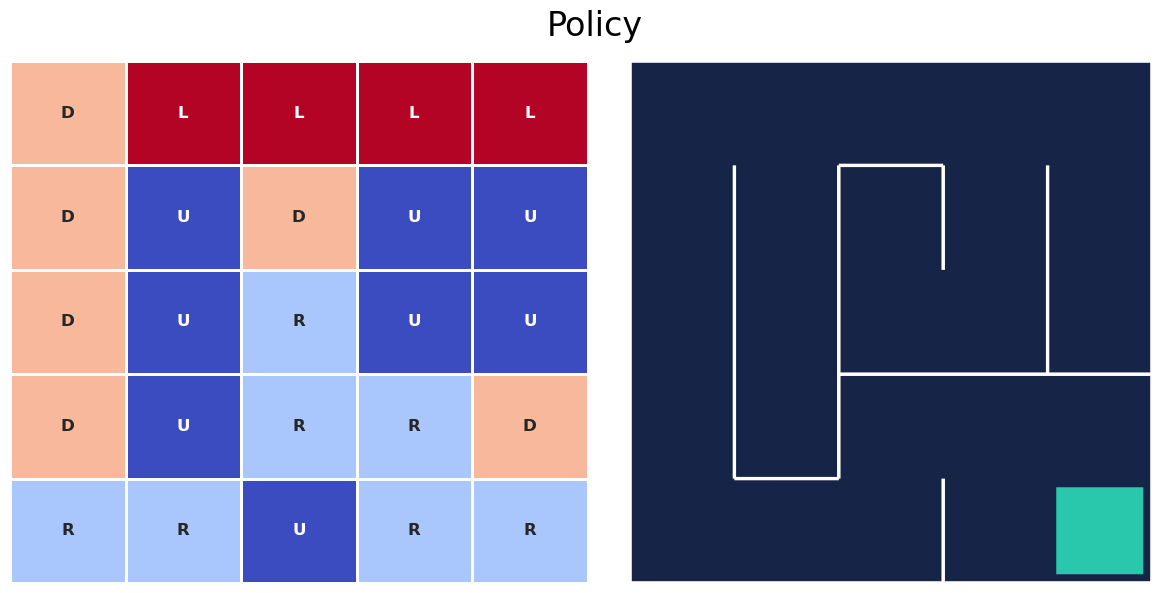

In [18]:
plot_policy(policy_probs, frame)

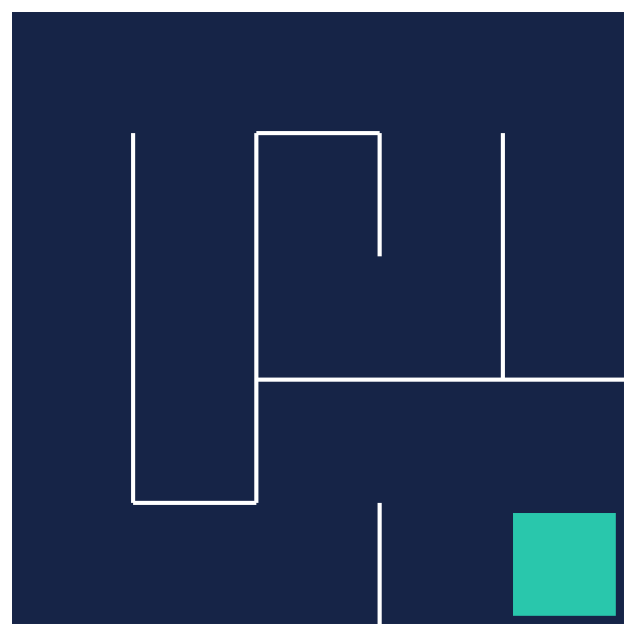

In [19]:
test_agent(env, policy)